<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_2_3_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 2.3: Independent variables and random samples**

Concepts covered:


* 2.3.1 Joint probability distributions
* 2.3.2. Correlation and dependence
* 2.3.3. Random samples

#   2.3.1 Joint probability distributions

The concept of **joint probability distributions** describes the probability of two or more random variables occurring together. For **discrete random variables**, the **joint probability mass function (PMF)** assigns probabilities to specific pairs of values. The joint probability mass function (PMF) for two discrete random variables $X$ and $Y$ is defined as:
$$ p(x, y) = P(X = x \, \text{and} \, Y = y) $$
with the properties that:
$$ p(x, y) \geq 0 \, \text{for all} \, x, y \quad \text{and} \quad \sum_{x} \sum_{y} p(x, y) = 1 $$


Whilst for **continuous random variables**, the **joint probability density function (PDF)** is used to determine probabilities over intervals. The joint probability density function (PDF) for two continuous random variables $X$ and $Y$ is given by:
$$ f(x, y) \quad \text{such that} \quad f(x, y) \geq 0 $$
and
$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, dx \, dy = 1 $$

**Marginal distributions** allow us to calculate the probability distribution of one variable by summing (or integrating) over the possible values of the other variable.

For discrete random variables, the marginal PMF of $X$ is:
$$ p_X(x) = \sum_{y} p(x, y) $$
and the marginal PMF of $Y$ is:
$$ p_Y(y) = \sum_{x} p(x, y) $$

For continuous random variables, the marginal PDF of $X$ is:
$$ f_X(x) = \int_{-\infty}^{\infty} f(x, y) \, dy $$
and the marginal PDF of $Y$ is:
$$ f_Y(y) = \int_{-\infty}^{\infty} f(x, y) \, dx $$

Finally, **independent random variables** are defined as variables whose joint probability distribution is equal to the product of their marginal distributions, indicating that the occurrence of one variable does not affect the other.

Two discrete random variables $X$ and $Y$ are independent if:
$$ p(x, y) = p_X(x) \cdot p_Y(y) \quad \text{for all values of} \, x \, \text{and} \, y $$

Similarly, two continuous random variables $X$ and $Y$ are independent if:
$$ f(x, y) = f_X(x) \cdot f_Y(y) \quad \text{for all values of} \, x \, \text{and} \, y $$


# Mobile Web Response Time with Signal Strength

(adapted problem from Engineering probability textbook)


In mobile browsing, the response time of a webpage plays a crucial role in user experience. If the response time is too slow, users may abandon the site. This response time is influenced by various factors, including signal strength, measured by the number of bars. Let X represent the number of bars of signal strength, and Y represent the response time (in seconds, rounded to the nearest second).

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Joint probability mass function for Signal Strength (X) and Response Time (Y)
joint_pmf_table = {
    (1, 1): 0.10, (1, 2): 0.05, (1, 3): 0.05, (1, 4): 0.20,
    (2, 1): 0.25, (2, 2): 0.10, (2, 3): 0.03, (2, 4): 0.02,
    (3, 1): 0.02, (3, 2): 0.15, (3, 3): 0.01, (3, 4): 0.02
}

# Joint PMF function
def joint_pmf(x, y):
    return joint_pmf_table.get((x, y), 0)

# Marginal probability mass function for Signal Strength X
def marginal_pmf_X(x):
    return sum(joint_pmf(x, y) for y in range(1, 5))

# Marginal probability mass function for Response Time Y
def marginal_pmf_Y(y):
    return sum(joint_pmf(x, y) for x in range(1, 4))

# Check if two random variables X and Y are independent
def check_independence(x, y):
    return np.isclose(joint_pmf(x, y), marginal_pmf_X(x) * marginal_pmf_Y(y))

# setting up the joint probability mass function
x_vals = [1, 2, 3]
y_vals = [1, 2, 3, 4]
joint_probabilities = np.array([[joint_pmf(x, y) for y in y_vals] for x in x_vals])


# Print out the marginal probabilities for X
for x in x_vals:
    print(f"Marginal PMF for X (Bars) = {x}: {marginal_pmf_X(x)}")

# Print out the marginal probabilities for Y
for y in y_vals:
    print(f"Marginal PMF for Y (Response Time) = {y}: {marginal_pmf_Y(y)}")

# Example of independence check
x = 2
y = 3
print(f"Are X = {x} (Signal Bars) and Y = {y} (Response Time) independent? {check_independence(x, y)}")

RHS = marginal_pmf_X(x) * marginal_pmf_Y(y)
LHS = joint_pmf(x, y)

print(f"Marginal PMF for {x} Bars * Marginal PMF for {y} second response time is {RHS}")
print(f"Joint pmf when X = {x} and Y = {y} is {LHS}")

Marginal PMF for X (Bars) = 1: 0.4
Marginal PMF for X (Bars) = 2: 0.4
Marginal PMF for X (Bars) = 3: 0.19999999999999998
Marginal PMF for Y (Response Time) = 1: 0.37
Marginal PMF for Y (Response Time) = 2: 0.30000000000000004
Marginal PMF for Y (Response Time) = 3: 0.09
Marginal PMF for Y (Response Time) = 4: 0.24
Are X = 2 (Signal Bars) and Y = 3 (Response Time) independent? False
Marginal PMF for 2 Bars * Marginal PMF for 3 second response time is 0.036
Joint pmf when X = 2 and Y = 3 is 0.03


#    2.3.2. Correlation and dependence

In the analysis of the relationship between two random variables $X$ and $Y$, covariance and correlation are crucial concepts. The covariance is defined as

$$
\text{Cov}(X,Y) = E[(X - \mu_X)(Y - \mu_Y)] = \sum_x \sum_y (x - \mu_X)(y - \mu_Y) p(x,y) \quad \text{(for discrete variables)}
$$

or

$$
\text{Cov}(X,Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x - \mu_X)(y - \mu_Y) f(x,y) \,dx \,dy \quad \text{(for continuous variables)}
$$

where $\mu_X$ and $\mu_Y$ are the expected values of $X$ and $Y$, respectively. The correlation coefficient, denoted as $ \rho_{X,Y} $, quantifies the strength and direction of the linear relationship between the two variables:

$$
\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}
$$

where $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$. The correlation coefficient has properties such as $ |\rho| \leq 1 $ and $ \rho = 0 $ indicating independence only if $X$ and $Y$ are actually independent.


# Mobile Web Response Time with Signal Strength cont.

The below program uses the same problem set-up as the discrete joint pmf program. It then computes the expected values, variances, and covariance for these random variables. Finally, the code calculates the correlation coefficient between X and Y, providing insights into their relationship. This setup can be used to analyze the dependencies between signal strength and response time, which are crucial for performance assessment in communication systems.

In [15]:
# Since reusing setup from above program, don't need to redefine the functions or variables

# Expected value of X (E[X])
def expected_value_X():
    return sum(x * marginal_pmf_X(x) for x in range(1, 4))

# Expected value of Y (E[Y])
def expected_value_Y():
    return sum(y * marginal_pmf_Y(y) for y in range(1, 5))

# Covariance function for X and Y
def covariance_X_Y():
    E_X = expected_value_X()
    E_Y = expected_value_Y()
    cov = 0
    for x in range(1, 4):
        for y in range(1, 5):
            cov += (x - E_X) * (y - E_Y) * joint_pmf(x, y)
    return cov

# Calculate variance for X and Y
def variance_X():
    E_X = expected_value_X()
    var = 0
    for x in range(1, 4):
        var += (x - E_X) ** 2 * marginal_pmf_X(x)
    return var

def variance_Y():
    E_Y = expected_value_Y()
    var = 0
    for y in range(1, 5):
        var += (y - E_Y) ** 2 * marginal_pmf_Y(y)
    return var

# Correlation coefficient function
def correlation_coefficient():
    cov = covariance_X_Y()
    std_X = np.sqrt(variance_X())
    std_Y = np.sqrt(variance_Y())
    if std_X == 0 or std_Y == 0:
        return None  # Avoid division by zero
    return cov / (std_X * std_Y)

# Calculate results
cov_XY = covariance_X_Y()
corr_XY = correlation_coefficient()

# Print results focused on covariance and correlation
print(f"Covariance between X (Signal Strength) and Y (Response Time): {cov_XY:.4f}")
print(f"Correlation coefficient between X and Y: {corr_XY:.4f}" if corr_XY is not None else "Correlation coefficient is undefined.")


Covariance between X (Signal Strength) and Y (Response Time): -0.2800
Correlation coefficient between X and Y: -0.3185


# 2.3.3. Random samples


A simple random sample consists of independent random variables drawn from the same probability distribution. The sample mean, denoted as $\bar{X}$, is calculated as $$\bar{X} = \frac{1}{n}(X_1 + \cdots + X_n)$$which provides an estimate of the population mean $\mu$.

According to the central limit theorem, as the sample size $n$ increases, the distribution of $\bar{X}$ approaches a normal distribution, regardless of the population's original distribution. The properties of the sample mean, such as $E(\bar{X}) = \mu$ and $Var(\bar{X}) = \frac{\sigma^2}{n}$, highlight the relationship between sample size and the variability of the sample mean.




# Students Test Scores

This example simulates a population of 1,000 students' test scores and draws random samples from this population. It demonstrates how the distribution of sample means approaches a normal distribution as the number of samples increases, while maintaining a consistent sample size. This illustrates the central limit theorem in action.

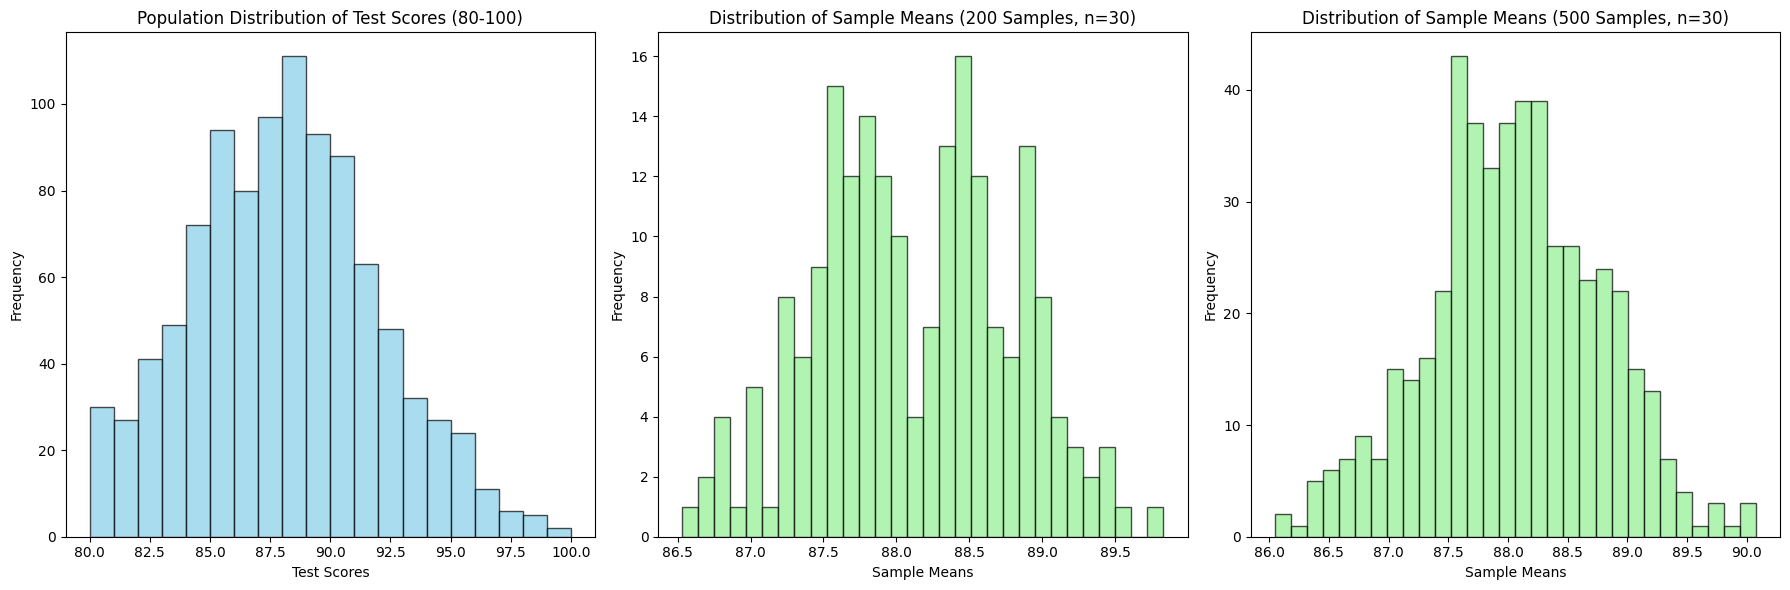

Population Mean (μ): 88.09
Population Standard Deviation (σ): 3.85
Sample Mean 1 (should be close to μ): 88.12
Sample Standard Deviation 1 (σX̄): 0.66
Sample Mean 2 (should be close to μ): 88.05
Sample Standard Deviation 2 (σX̄): 0.72


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Simulate a population of test scores (ranging from 80 to 100)
population_size = 1000
# Generate scores from a normal distribution with mean 88 and standard deviation 4
population = np.random.normal(loc=88, scale=4, size=population_size)

# Clip the population to a minimum of 80 and a maximum of 100
# This ensures that all scores fall within the valid range I've chosen to define
population = np.clip(population, 80, 100)

# Define this function to draw random samples and calculate sample means
def sample_means(population, sample_size, num_samples):
    means = []
    for _ in range(num_samples):
        # Randomly select a sample from the population without replacement
        sample = np.random.choice(population, size=sample_size, replace=False)
        # Calculate the mean of the sample and store it
        means.append(np.mean(sample))
    return means

# Will use these parameters for sampling
sample_size = 30  # Size of each sample
num_samples = 200  # Number of samples to draw for the first histogram

# Draw random samples and compute sample means for 200 samples
means1 = sample_means(population, sample_size, num_samples)

# Will keep sample size same but adjust number drawn
num_samples = 500  # Number of samples to draw for the second histogram

means2 = sample_means(population, sample_size, num_samples)

# Plot the results side by side
plt.figure(figsize=(18, 6))

# Plot the original population distribution
plt.subplot(1, 3, 1)
plt.hist(population, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Population Distribution of Test Scores (80-100)')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')

# Plot the distribution of sample means for 200 samples
plt.subplot(1, 3, 2)
plt.hist(means1, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Sample Means (200 Samples, n={sample_size})')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')

# Plot the distribution of sample means for 500 samples
plt.subplot(1, 3, 3)
plt.hist(means2, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Sample Means (500 Samples, n={sample_size})')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display the theoretical mean and standard deviation
population_mean = np.mean(population)
population_std = np.std(population)

print(f"Population Mean (μ): {population_mean:.2f}")
print(f"Population Standard Deviation (σ): {population_std:.2f}")
print(f"Sample Mean 1 (should be close to μ): {np.mean(means1):.2f}")
print(f"Sample Standard Deviation 1 (σX̄): {np.std(means1):.2f}")
print(f"Sample Mean 2 (should be close to μ): {np.mean(means2):.2f}")
print(f"Sample Standard Deviation 2 (σX̄): {np.std(means2):.2f}")
